<a href="https://colab.research.google.com/github/ksolosina/BCIT/blob/master/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание: 1) Выберите набор данных (датасет) для решения задачи классификации или регресии. 2) В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков. 3) С использованием метода train_test_split разделите выборку на обучающую и тестовую. 4) Обучите 1) одну из линейных моделей, 2) SVM и 3) дерево решений. Оцените качество моделей с помощью трех подходящих для задачи метрик. Сравните качество полученных моделей. 5) Произведите для каждой модели подбор одного гиперпараметра с использованием GridSearchCV и кросс-валидации. 6) Повторите пункт 4 для найденных оптимальных значений гиперпараметров. Сравните качество полученных моделей с качеством моделей, полученных в пункте 4.


In [0]:
import numpy as np #библиотека для работы с многомерными массивами данных и математическими операциями над ними
import pandas as pd #библиотека для анализа и обработки данных
from scipy import stats
from sklearn.datasets import load_iris #берём датасет
import matplotlib.pyplot as plt #простое рисование графиков
import seaborn as sns #удобные дефолтные настройки графиков из matpotlib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression # для линейной модели
from sklearn.svm import SVR # для SVM модели (метод опорных векторов)
from sklearn.tree import DecisionTreeRegressor # для дерева решений

%matplotlib inline
#для сохранения в ноутбуке вывода моих графиков

In [5]:
df = load_iris()
df = pd.DataFrame(data = np.c_[df['data'], df['target']], columns = df['feature_names'] + ['target'])
df.head()
# таргет цель 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


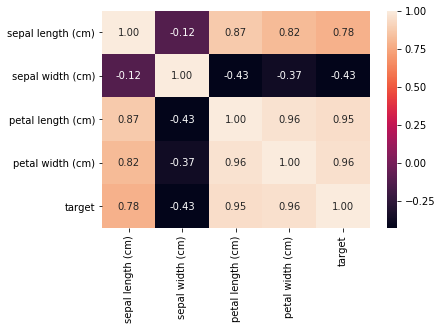

In [6]:
#Построим корреляционную матрицу
sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.2f')

In [0]:
df.loc[:, df.columns!='target'] = df.loc[:, df.columns!='target'].apply(lambda x: x/x.max(), axis=0)  # нормализуем данные (нет пустых) 

In [0]:
x_train, x_test, y_train, y_test = train_test_split(df.loc[:, df.columns!='target'], #тестовая выборка и тренировочная, у - цели трен и тест(через train_test_split) 
                                                    df['target'], 
                                                    test_size= 0.33)

Линейная регрессия (метод наименьших квадратов)


In [0]:
lr = LinearRegression().fit(x_train, y_train) #обучили модель натренеровали 
#линейные модели. ищем точку экстр функц, такую что a сама из себя представляет функу ошибки при этом-> стремится к мин мы ищем коэф пер который даст минимум

In [12]:
print(mean_absolute_error(lr.predict(x_test), y_test)) #пытаемся предугадать у тест по данным х тест получаем ошибку 
# средняя абсолютная ошибка
print(r2_score(lr.predict(x_test), y_test))
# коэффициент детерминации y_test от x_test 
print(median_absolute_error(lr.predict(x_test), y_test))
# медианная абсолютная ошибка

0.16515838498618557
0.907908309924505
0.12438050681020885


SVM (метод опорных векторов) поиск разделяющей плоскости

In [17]:
svr = SVR().fit(x_train, y_train) # обучаем модель 

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [18]:
print(mean_absolute_error(svr.predict(x_test), y_test))
print(r2_score(svr.predict(x_test), y_test))
print(median_absolute_error(svr.predict(x_test), y_test))
#выводим статистику 
#разделим точки в 4х мер пространстве чтобы узнать к какому таргеру мы можем причислить строку, у нас 3 класса, какой вид ириса представляет тот или иной цветок, мы строим n-1мерную плоскость, 
#которая поможет в буд точно определять какие точки относятся к какому классу. метод опорных векторов работает точнее чем лин регрес


0.16979715548157906
0.8963622199188864
0.11154607980219122


Decision Tree 

In [0]:
dt = DecisionTreeRegressor(max_depth=2).fit(x_train, y_train) #обучаем. глубина дерева два шага один вопрос. работает лучше всех моделей 

In [22]:
print(mean_absolute_error(dt.predict(x_test), y_test))
print(r2_score(dt.predict(x_test), y_test))
print(median_absolute_error(dt.predict(x_test), y_test))

0.1137142857142857
0.8349386935100096
0.0


GridSearch

In [0]:
lr = GridSearchCV(LinearRegression(), {'n_jobs':range(1,10)}, cv=3).fit(x_train, y_train).best_estimator_
# лучшее кол-во джобов=1 () разделение обучения на подпроцессы , обучаем модель

In [24]:
print(mean_absolute_error(lr.predict(x_test), y_test))
print(r2_score(lr.predict(x_test), y_test))
print(median_absolute_error(lr.predict(x_test), y_test))


0.16515838498618557
0.907908309924505
0.12438050681020885


In [0]:
svr = GridSearchCV(SVR(), {'degree':range(1,10)}, cv=3).fit(x_train, y_train).best_estimator_
# лучшая степень=1

In [26]:
print(mean_absolute_error(svr.predict(x_test), y_test))
print(r2_score(svr.predict(x_test), y_test))
print(median_absolute_error(svr.predict(x_test), y_test))


0.16979715548157906
0.8963622199188864
0.11154607980219122


In [0]:
dt = GridSearchCV(DecisionTreeRegressor(), {'max_depth':range(1,10)}, cv=3).fit(x_train, y_train).best_estimator_
# лучшая глубина

In [30]:
print(mean_absolute_error(dt.predict(x_test), y_test))
print(r2_score(dt.predict(x_test), y_test))
print(median_absolute_error(dt.predict(x_test), y_test))

0.1
0.8570407433881344
0.0
